# Loading Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('/kaggle/input/airfare-ml-predicting-flight-fares/Scraped_dataset.csv')

In [3]:
df.head()

,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price
0,15/01/2023,16/01/2023,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335"
1,15/01/2023,16/01/2023,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899"
2,15/01/2023,16/01/2023,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801"
3,15/01/2023,16/01/2023,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794"
4,15/01/2023,16/01/2023,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955"


# Feature Engineering

In [4]:
# define the lambda function to split the values and create separate columns
split_values = lambda x: pd.Series(x.split('\n'))

In [5]:
# use the apply() method to apply the lambda function to the "Airline-Class" column
df[['Airline', 'Flight Code', 'Class']] = df['Airline-Class'].apply(split_values)

In [6]:
# clean up the column names by removing any leading or trailing white space
df.columns = df.columns.str.strip()

# capitalize the first letter of each word in the "Class" column
df['Class'] = df['Class'].str.capitalize()

# drop columns after atering
df=df.drop(['Airline-Class'], axis=1)

In [7]:
# use the str.split() method to split the values in the "Departure Time" column by "\n"
df[['Departure Time', 'Departure Location']] = df['Departure Time'].str.split('\n', expand=True)

# use the str.split() method to split the values in the "Arrival Time" column by "\n"
df[['Arrival Time', 'Arrival Location']] = df['Arrival Time'].str.split('\n', expand=True)

In [8]:
# changing "Total stops" from string to integers
df['Total Stops'] = df['Total Stops'].replace({'1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia.*': '1-stop'}, regex=True)
df['Total Stops'] = df['Total Stops'].map({'non-stop': 0, '1-stop': 1, '2+-stop': 2}).astype(int)

In [9]:
#changing Duration values from string to time in minutes
df["Duration in minutes"] = pd.to_timedelta(df["Duration"]).dt.total_seconds() // 60

df["Duration in minutes"]=df["Duration in minutes"].astype(int)

# drop columns after atering
df=df.drop(['Duration'], axis=1)

In [10]:
#changing price from string to int
df["Price"] = df["Price"].str.replace(",", "").astype(int)

In [11]:
#changing date from string to date type
df['Date of Booking'] = pd.to_datetime(df['Date of Booking'])
df['Date of Journey'] = pd.to_datetime(df['Date of Journey'])

# Overviewing the data

In [12]:
df.head()

,Date of Booking,Date of Journey,Departure Time,Arrival Time,Total Stops,Price,Airline,Flight Code,Class,Departure Location,Arrival Location,Duration in minutes
0,2023-01-15,2023-01-16,20:00,22:05,0,5335,SpiceJet,SG-8169,Economy,Delhi,Mumbai,125
1,2023-01-15,2023-01-16,23:00,01:20,0,5899,Indigo,6E-2519,Economy,Delhi,Mumbai,140
2,2023-01-15,2023-01-16,22:30,00:40,0,5801,GO FIRST,G8- 354,Economy,Delhi,Mumbai,130
3,2023-01-15,2023-01-16,18:50,20:55,0,5794,SpiceJet,SG-8709,Economy,Delhi,Mumbai,125
4,2023-01-15,2023-01-16,20:00,22:10,0,5955,Air India,AI-805,Economy,Delhi,Mumbai,130


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date of Booking      452088 non-null  datetime64[ns]
 1   Date of Journey      452088 non-null  datetime64[ns]
 2   Departure Time       452088 non-null  object        
 3   Arrival Time         452088 non-null  object        
 4   Total Stops          452088 non-null  int64         
 5   Price                452088 non-null  int64         
 6   Airline              452088 non-null  object        
 7   Flight Code          452088 non-null  object        
 8   Class                452088 non-null  object        
 9   Departure Location   452088 non-null  object        
 10  Arrival Location     452088 non-null  object        
 11  Duration in minutes  452088 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 41.4+ MB


In [14]:
df.describe()

,Total Stops,Price,Duration in minutes
count,452088.000000,452088.000000,452088.000000
mean,0.953390,22840.100890,740.953319
std,0.424473,20307.963002,445.888673
min,0.000000,1307.000000,45.000000
25%,1.000000,8762.750000,395.000000
50%,1.000000,13407.000000,680.000000
75%,1.000000,35587.000000,990.000000
max,2.000000,143019.000000,2615.000000


In [15]:
df.isna().sum()

Date of Booking        0
Date of Journey        0
Departure Time         0
Arrival Time           0
Total Stops            0
Price                  0
Airline                0
Flight Code            0
Class                  0
Departure Location     0
Arrival Location       0
Duration in minutes    0
dtype: int64

# EDA Through PLots

### Bar chart of mean ticket prices by airline:

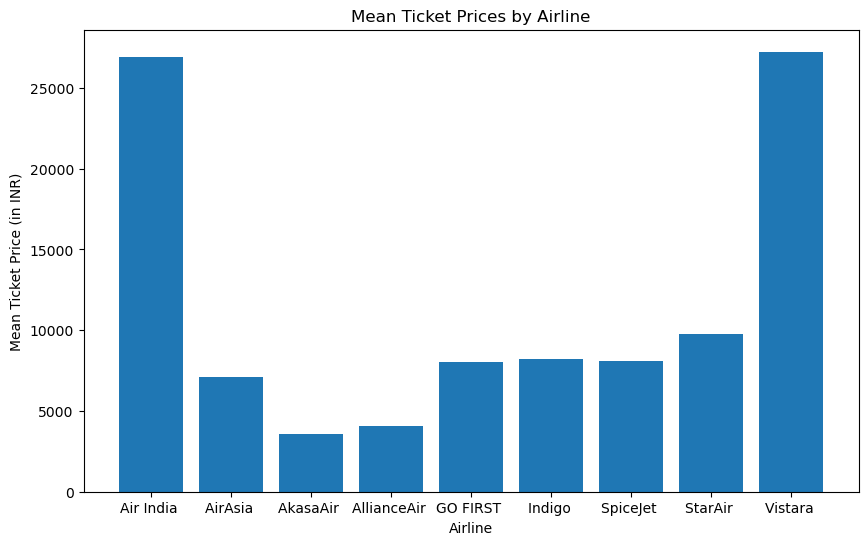

In [16]:
import matplotlib.pyplot as plt

mean_prices = df.groupby('Airline')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(mean_prices['Airline'], mean_prices['Price'])
plt.xlabel("Airline")
plt.ylabel("Mean Ticket Price (in INR)")
plt.title("Mean Ticket Prices by Airline")
plt.show()

### Histogram of ticket prices:

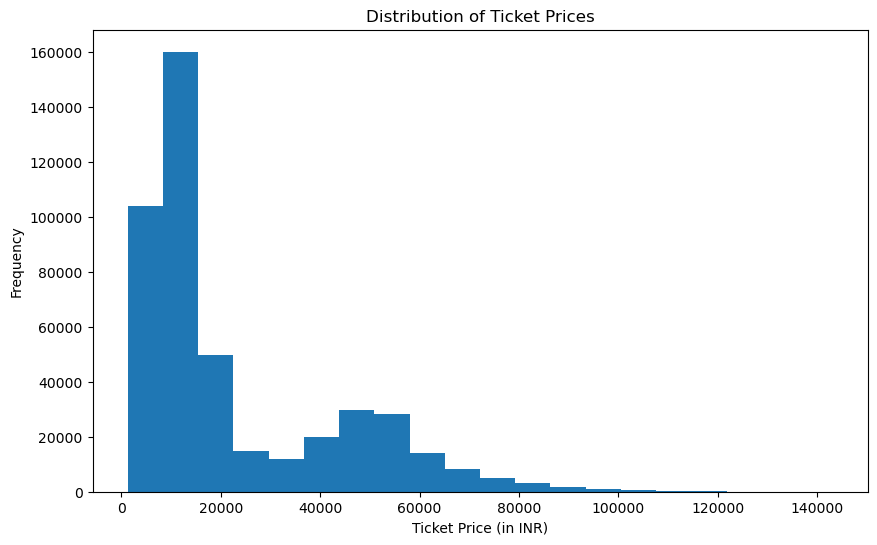

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=20)
plt.xlabel("Ticket Price (in INR)")
plt.ylabel("Frequency")
plt.title("Distribution of Ticket Prices")
plt.show()

### Line plot of ticket prices over time:

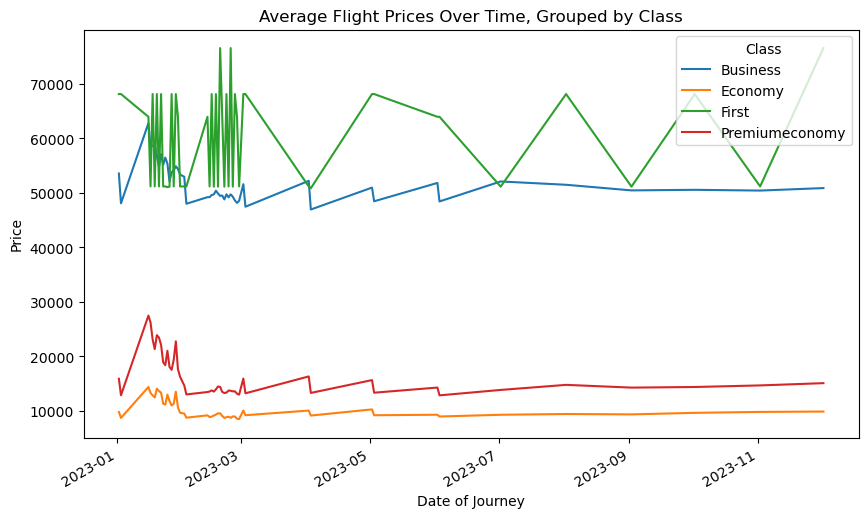

In [18]:
# Create a new dataframe grouping by class and date, and calculating the mean price
df_grouped_journey = df.groupby(['Class', 'Date of Journey'])['Price'].mean().reset_index()

# Pivot the data so that each class has its own column
df_pivot_journey = df_grouped_journey.pivot(index='Date of Journey', columns='Class', values='Price')

# Create a line plot
df_pivot_journey.plot(figsize=(10, 6))

# Add labels and title
plt.title('Average Flight Prices Over Time, Grouped by Class')
plt.xlabel('Date of Journey')
plt.ylabel('Price')

plt.show()

### Box plot of ticket prices by airline:

<Figure size 1000x600 with 0 Axes>

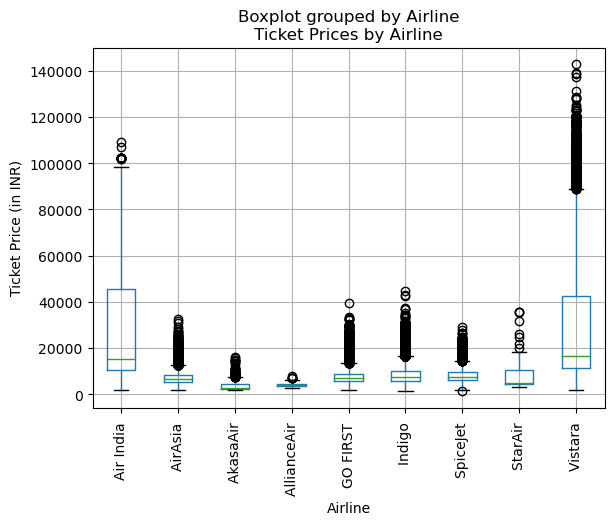

In [19]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Price', by='Airline')
plt.xticks(rotation=90)
plt.xlabel("Airline")
plt.ylabel("Ticket Price (in INR)")
plt.title("Ticket Prices by Airline")
plt.show()

### Scatter plot of ticket prices by duration:

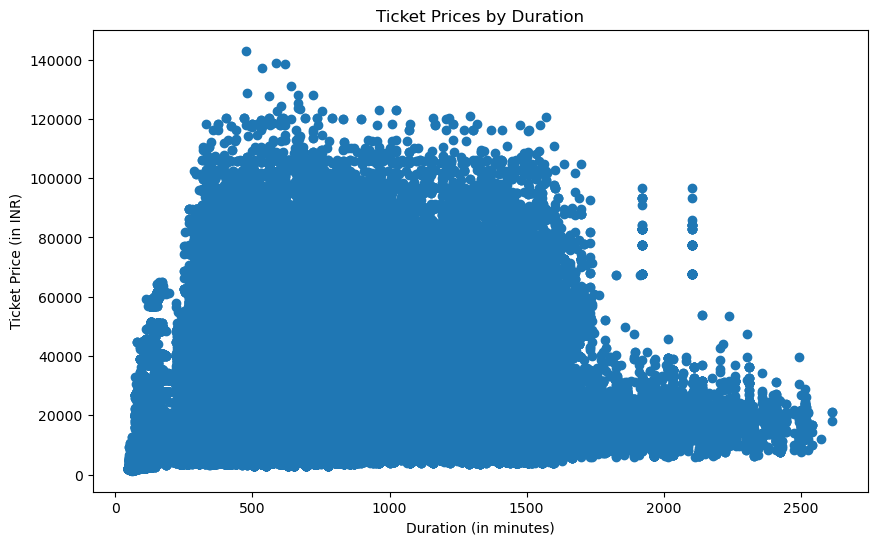

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration in minutes'], df['Price'])
plt.xlabel("Duration (in minutes)")
plt.ylabel("Ticket Price (in INR)")
plt.title("Ticket Prices by Duration")
plt.show()

### Histogram of flight duration:

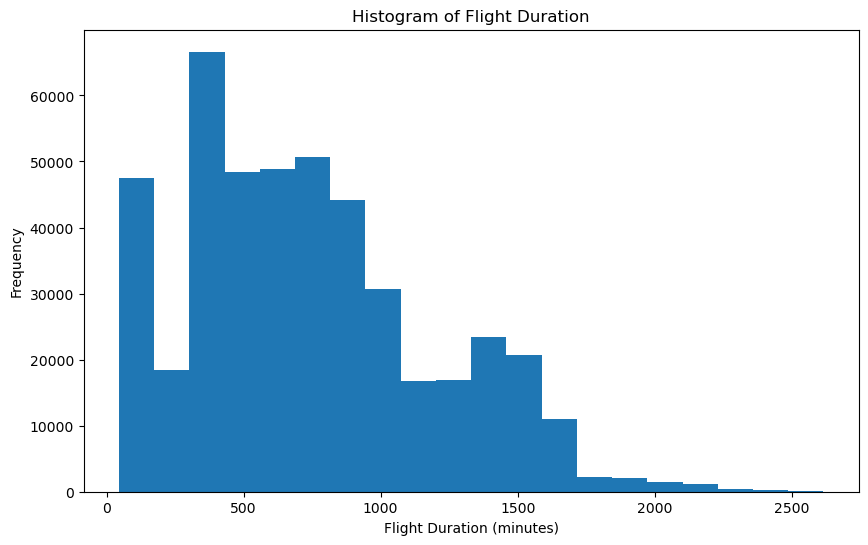

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(df['Duration in minutes'], bins=20)
plt.xlabel('Flight Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Flight Duration')
plt.show()

### Stacked bar plot of Total Stops by Airline and Class:

Text(0, 0.5, 'Count of Flights')

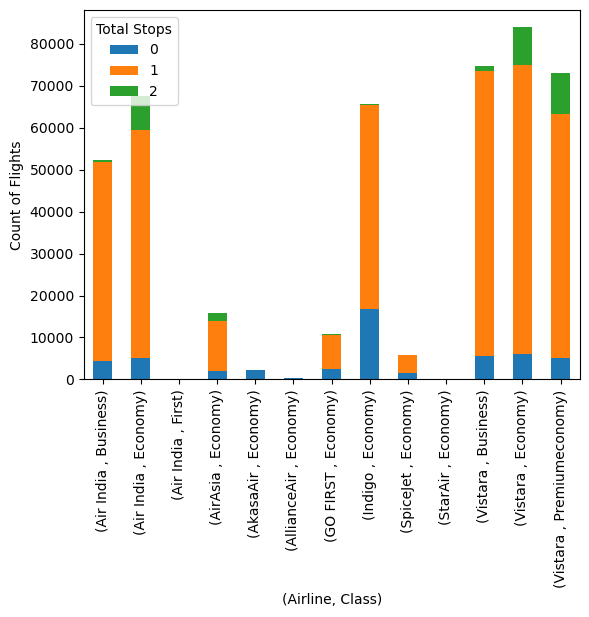

In [22]:
import seaborn as sns

stops_by_airline_class = df.groupby(['Airline', 'Class'])['Total Stops'].value_counts().unstack().fillna(0)
stops_by_airline_class.plot(kind='bar', stacked=True)
plt.xlabel('(Airline, Class)')
plt.ylabel('Count of Flights')

### Violin plot of Price by Total Stops:

<AxesSubplot:xlabel='Total Stops', ylabel='Price'>

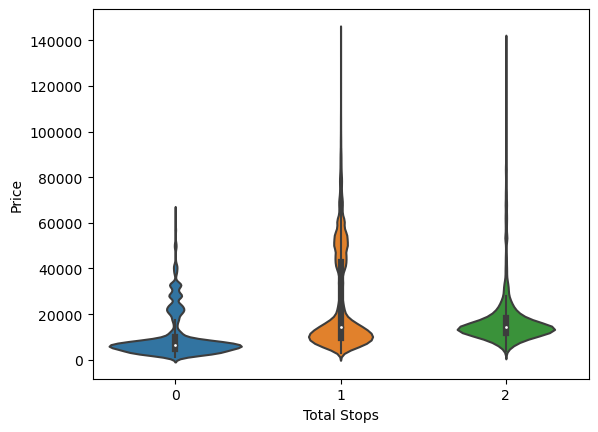

In [23]:
sns.violinplot(x="Total Stops", y="Price", data=df)

### Pie chart for Total Stops

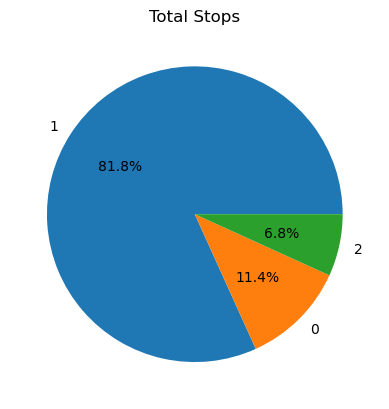

In [24]:
stops_counts = df["Total Stops"].value_counts()
plt.pie(stops_counts, labels=stops_counts.index, autopct="%1.1f%%")
plt.title("Total Stops")
plt.show()

### Pie chart for Class

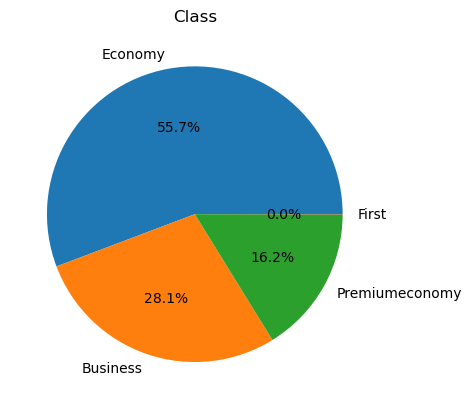

In [25]:
class_counts = df["Class"].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct="%1.1f%%")
plt.title("Class")
plt.show()

### Plot for most popular departure location

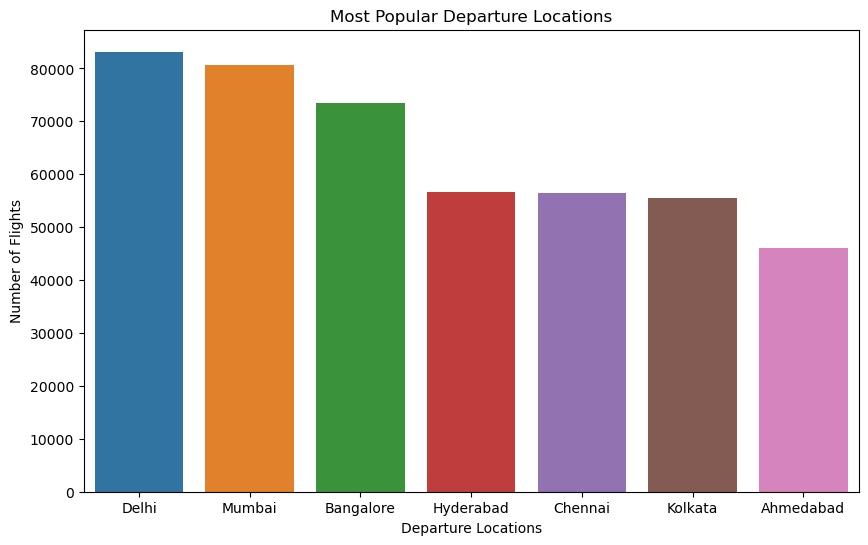

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x='Departure Location', data=df, order=df['Departure Location'].value_counts().index)
plt.title('Most Popular Departure Locations')
plt.xlabel('Departure Locations')
plt.ylabel('Number of Flights')
plt.show()

### Plot for most popular arrival location

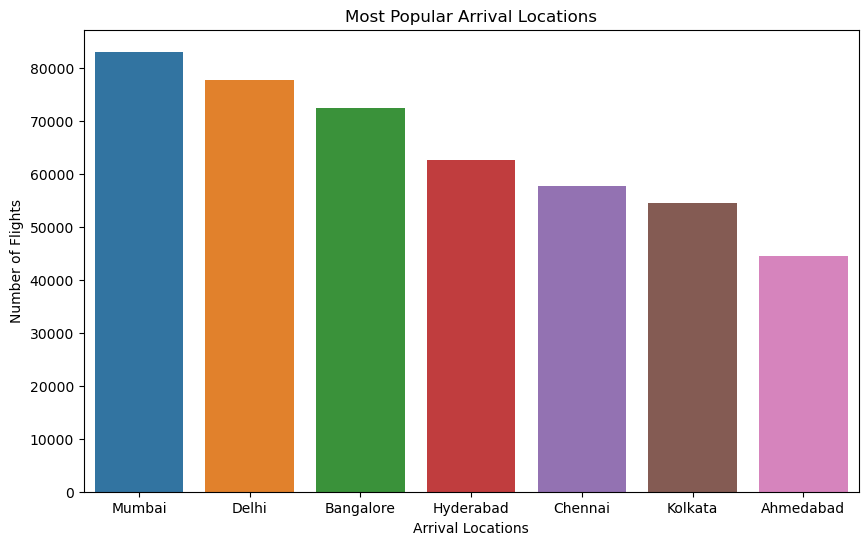

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x='Arrival Location', data=df, order=df['Arrival Location'].value_counts().index)
plt.title('Most Popular Arrival Locations')
plt.xlabel('Arrival Locations')
plt.ylabel('Number of Flights')
plt.show()

# Machine learning

In [28]:
flight_data = df.copy(deep=True)

In [29]:
# Select the features and target variable
X = flight_data[['Departure Location', 'Arrival Location','Airline', 'Total Stops', 'Duration in minutes','Class']] 
y = flight_data['Price']

In [30]:
# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Departure Location', 'Arrival Location','Airline','Class']) 

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model using root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

NameError: name 'mean_squared_error' is not defined

# ODD Data Insights

**After continuos bad RMSE score i tried to see any anamolies on my data. I found that the date of booking and date of journey had mismatches on various occations. I found this when i tried to calculate the gap days between the two for regression. See the below code to see that mismatch**

In [ ]:
flight_data['Gap days'] = (flight_data['Date of Journey'] - flight_data['Date of Booking']).dt.days

In [ ]:
flight_data.head()

In [ ]:
flight_data['Gap days'].unique()

In [ ]:
df_filtered = flight_data[flight_data['Gap days'] == -12]
df_filtered

**See i have negative values and very large values for such small destinations. This shouln't be possible. So I checked the cleaned data to see if any siilar anamolies are present.**

In [ ]:
cleaned = pd.read_csv('/kaggle/input/airfare-ml-predicting-flight-fares/Cleaned_dataset.csv')

In [ ]:
cleaned.head()

In [ ]:
cleaned['Days_left'].unique()

**Now i don't see any weired anamolies in the gap days but i wish the author had kept the date of booking to cross verify. So this confirms that either the collect data is wrong or the format might me wrong so i checked the format of both date of journey and date of booking of the data i cleaned**

In [ ]:
# Plot of Price vs. Date of Journey
plt.scatter(flight_data['Date of Journey'], flight_data['Price'], alpha=0.5)
plt.title('Price vs. Date of Journey')
plt.xlabel('Date of Journey')
plt.ylabel('Price')
plt.show()

In [ ]:
# Plot of Price vs. Date of Booking
plt.scatter(flight_data['Date of Booking'], flight_data['Price'], alpha=0.5)
plt.title('Price vs. Date of Booking')
plt.xlabel('Date of Booking')
plt.ylabel('Price')
plt.show()

**As Guessed i can see that the format of "Date of Journey" is good while that of "Date of Booking" is bad. Thus when we applied the "datetime" function in pandas it messed the whole column.**

**Finally i tried to apply the same ML model on the cleaned dataset to see if there is any improvement.**

In [ ]:
# Select the features and target variable
X = cleaned[['Source', 'Arrival','Airline', 'Total_stops', 'Duration_in_hours','Class','Journey_day']] 
y = cleaned['Fare']

In [ ]:
# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Source', 'Arrival','Airline','Class','Total_stops','Journey_day']) 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model using root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

**Unforunately no. Linear Regression yeilds even bad values. I Tried to caefully selected feature columns but the results hover around this score. Also, i'm new to Machine learning. so there might be better ways to do it. If anyone knows any other ways, I'd would glad to know.**

# The End